In [1]:
pwd

'C:\\Users\\user\\Documents\\GitHub\\4th_revolution\\4th_revolution-master\\4th_revolution-master\\bigdata\\bigdata\\home.selection\\bigdata\\ML\\ml_code\\test'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [3]:
loans = pd.read_csv('loans_tr.csv')
loans.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [5]:
loans.describe()

,Unnamed: 0,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8.578000e+03,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000
mean,4798.572511,0.803567,0.122617,318.093373,10.932431,12.622325,710.749709,4547.756538,1.706579e+04,46.757076,1.571695,0.164607,0.062252,0.159594
std,2766.006017,0.397323,0.026817,206.994270,0.615859,6.881663,38.088227,2494.931515,3.450448e+04,29.000330,2.197341,0.550745,0.264656,0.366251
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2399.250000,1.000000,0.103900,163.570000,10.555813,7.242500,682.000000,2792.781250,3.193250e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,4804.500000,1.000000,0.122100,267.740000,10.928884,12.660000,707.000000,4110.041667,8.690000e+03,46.200000,1.000000,0.000000,0.000000,0.000000
75%,7193.500000,1.000000,0.140700,430.750000,11.294022,17.960000,737.000000,5729.958333,1.843375e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,9576.000000,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loans['not.fully.paid'].value_counts()

0    7209
1    1369
Name: not.fully.paid, dtype: int64

Text(0.5, 0, 'FICO')

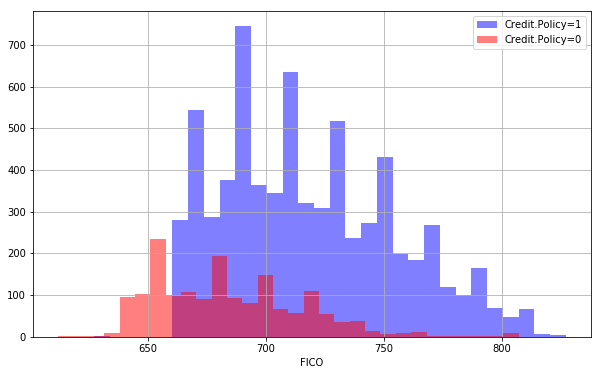

In [8]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

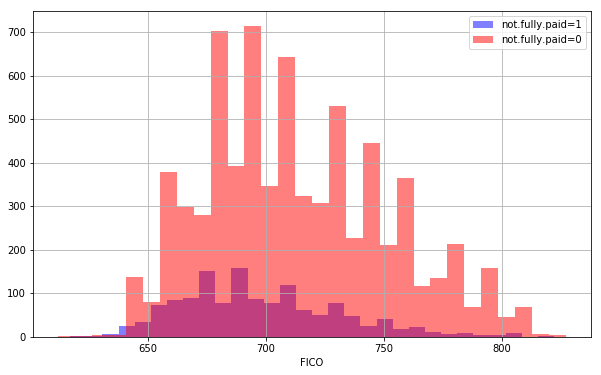

In [9]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

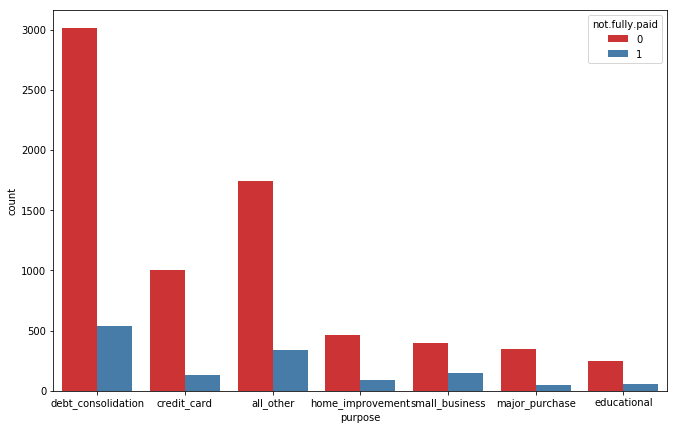

In [10]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

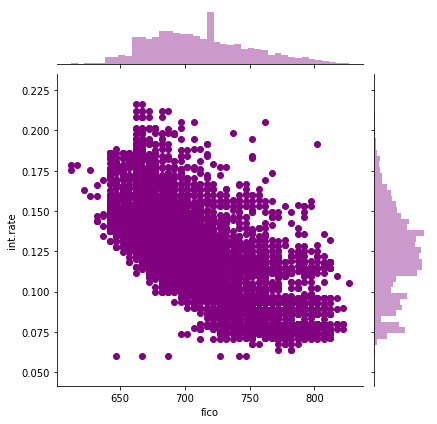

In [11]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

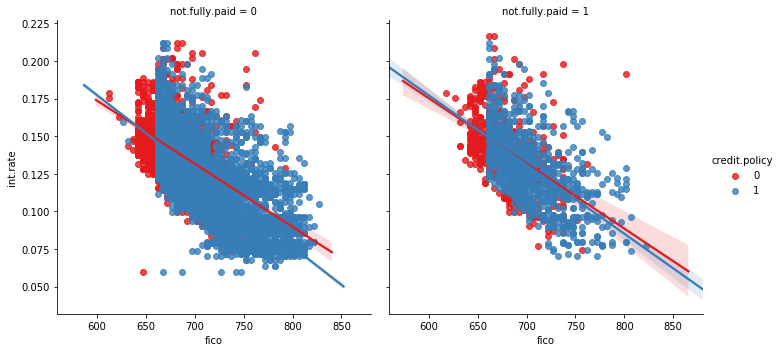

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

<Figure size 1440x1080 with 0 Axes>

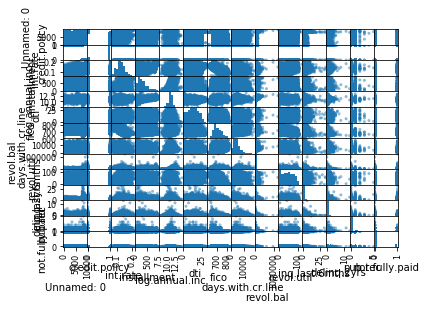

In [13]:
# scatter plot matrix
plt.figure(figsize=(20,15))
scatter_matrix(loans)
plt.show()

In [14]:
cat_feats = ['purpose']

In [15]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 20 columns):
Unnamed: 0                    8578 non-null int64
credit.policy                 8578 non-null int64
int.rate                      8578 non-null float64
installment                   8578 non-null float64
log.annual.inc                8578 non-null float64
dti                           8578 non-null float64
fico                          8578 non-null int64
days.with.cr.line             8578 non-null float64
revol.bal                     8578 non-null int64
revol.util                    8578 non-null float64
inq.last.6mths                8578 non-null int64
delinq.2yrs                   8578 non-null int64
pub.rec                       8578 non-null int64
not.fully.paid                8578 non-null int64
purpose_credit_card           8578 non-null uint8
purpose_debt_consolidation    8578 non-null uint8
purpose_educational           8578 non-null uint8
purpose_home_improvement      8

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 19 columns):
Unnamed: 0                    8578 non-null int64
credit.policy                 8578 non-null int64
int.rate                      8578 non-null float64
installment                   8578 non-null float64
log.annual.inc                8578 non-null float64
dti                           8578 non-null float64
fico                          8578 non-null int64
days.with.cr.line             8578 non-null float64
revol.bal                     8578 non-null int64
revol.util                    8578 non-null float64
inq.last.6mths                8578 non-null int64
delinq.2yrs                   8578 non-null int64
pub.rec                       8578 non-null int64
purpose_credit_card           8578 non-null uint8
purpose_debt_consolidation    8578 non-null uint8
purpose_educational           8578 non-null uint8
purpose_home_improvement      8578 non-null uint8
purpose_major_purchase        8

In [22]:
num_folds = 5
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [23]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [24]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_

In [26]:
import warnings
warnings.simplefilter('ignore')

results = []
names = []
for name, model in models:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
print(results)

LR: 0.838776 (0.012242)
SVC: 0.839942 (0.009698)
KNN: 0.821621 (0.010969)
CART: 0.750166 (0.015249)
NB: 0.820789 (0.013474)
RF: 0.833945 (0.009298)
[array([0.8417985 , 0.84346378, 0.84263114, 0.81515404, 0.85083333]), array([0.84346378, 0.84096586, 0.84013322, 0.82264779, 0.8525    ]), array([0.82847627, 0.82348043, 0.82014988, 0.80183181, 0.83416667]), array([0.76602831, 0.76852623, 0.74354704, 0.72772689, 0.745     ]), array([0.81681932, 0.82348043, 0.82514571, 0.79850125, 0.84      ]), array([0.84263114, 0.83513739, 0.8376353 , 0.81598668, 0.83833333])]


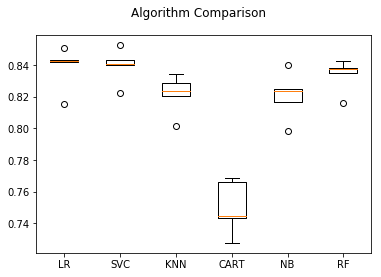

In [27]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [29]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])),
 ('ScaledSVC', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_

In [31]:
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.839610 (0.012392)
ScaledSVC: 0.838610 (0.011170)
ScaledKNN: 0.820789 (0.009818)
ScaledCART: 0.747667 (0.012284)
ScaledNB: 0.766491 (0.015388)
ScaledRF: 0.833779 (0.008345)


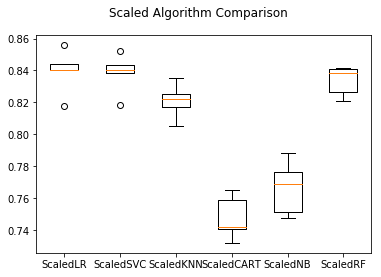

In [32]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
import warnings
warnings.simplefilter('ignore')

# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVC', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train,y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.840609 (0.012426)
ScaledSVC: 0.839942 (0.009698)
ScaledKNN: 0.818957 (0.008818)
ScaledCART: 0.752997 (0.008999)
ScaledNB: 0.766491 (0.015388)
ScaledRF: 0.831946 (0.011111)


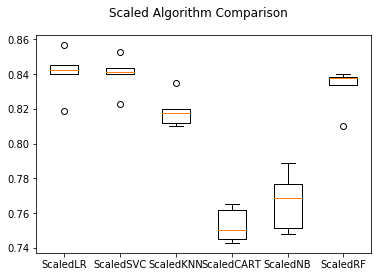

In [35]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500, 
                          learning_rate=0.1)

params = {"base_estimator__criterion" : ["gini", "entropy"],
          "base_estimator__max_features" : [7,8,],
          "base_estimator__max_depth" : [3,5, 7],
          "n_estimators": [20, 50, 100],
          "learning_rate": [0.4,  0.5, 0.6]
         }

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=7)
grid = grid.fit(X_train,y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_.feature_importances_ # 가장 영향을 많이 준 feature

In [ ]:
grid.score(x_ts, y_ts)

In [ ]:
adab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=3, max_features=8),
                          n_estimators=20, learning_rate=0.4)
adab.fit(X_train, y_train)
adab.score(x_ts, y_ts)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=200, subsample=0.5, max_depth=2, learning_rate=0.55)

params={'n_estimators':[20, 50, 100], 
                'learning_rate': [0.1, 0.05], #0.02, 0.01], 
                'subsample' : [0.5],#,0.6,0.7,0.8],
                'max_depth':[2, 4], #6 ,8], 
                'min_samples_leaf':[3, 5],#,9,15], 
                'max_features':[1.0, 0.3]#, 0.1] 
           } 

grid = GridSearchCV(estimator=gbr, param_grid=params, cv=5, n_jobs=-1)
grid = grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
grid.score(x_ts, y_ts)

In [ ]:
gbr = GradientBoostingClassifier(n_estimators=50, subsample=0.5, max_depth=4, learning_rate=0.05, \
                                 max_features=1.0, min_samples_leaf=3)

gbr.fit(X_train, y_train)
gbr.score(x_ts, y_ts)